In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')
from pipeline import *
plt.style.use('ggplot')

In [26]:
pipeline = AABB245_Pipeline(num_blocks=32, extrema_th=4)
dataset = PolymerDataset(['../data/AA66266AA.npy', '../data/AA66566AA.npy'], pipeline)

Processing ../data/AA66566AA.npy: 100%|██████████| 20026/20026 [01:14<00:00, 267.82it/s]


In [27]:
X, y = dataset.data.numpy(), dataset.labels.numpy()

In [28]:
X.shape

(40111, 4, 20)

In [29]:
X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))

In [30]:
X.shape

(40111, 80)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

model = RandomForestClassifier(min_samples_leaf=4)
model.fit(train_X, train_y)

preds = model.predict(test_X)
accuracy_score(test_y, preds), f1_score(test_y, preds)

(0.735759690888695, 0.7365805168986084)

In [32]:
model.feature_importances_

array([0.00406928, 0.00486106, 0.0338445 , 0.02507709, 0.01544658,
       0.0173637 , 0.01774971, 0.00221737, 0.00290865, 0.0145425 ,
       0.01599139, 0.01495293, 0.01567369, 0.00836655, 0.01395609,
       0.01425009, 0.01076932, 0.00489355, 0.01347026, 0.00497366,
       0.00408354, 0.0049332 , 0.03450338, 0.01893641, 0.01746509,
       0.04345832, 0.01762358, 0.00246486, 0.00265688, 0.01365095,
       0.01254084, 0.01151176, 0.01054973, 0.00919397, 0.0120739 ,
       0.01808062, 0.011504  , 0.00506157, 0.00519066, 0.00472538,
       0.00379271, 0.00482734, 0.03003618, 0.02171506, 0.01668169,
       0.03798746, 0.01822061, 0.00302085, 0.00240267, 0.01355721,
       0.01210229, 0.01129012, 0.01011194, 0.00943187, 0.012042  ,
       0.0153708 , 0.01077393, 0.00523577, 0.00516456, 0.00534691,
       0.00459915, 0.00496137, 0.03172956, 0.02078343, 0.01766643,
       0.02266663, 0.0160428 , 0.00266661, 0.00279999, 0.01088885,
       0.01178726, 0.01093509, 0.01007077, 0.00940114, 0.01345

In [35]:
features = ['num_signals', 'duration', 'max_current', 'min_current', 'mean_current', 'std_current', 'median_current',
            'num_peaks', 'num_lows', 'mean_peaks', 'std_peaks', 'mean_lows', 'std_lows',
            'max_amp', 'min_amp', 'mean_amp', 'std_amp', 'dwell_time', 'dwell_start', 'dwell_end']
importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
importance_df['block'] = [i // 20 for i in range(len(importance_df))]
importance_df['feature'] = features * 4

In [36]:
importance_df

,importance,block,feature
0,0.004069,0,num_signals
1,0.004861,0,duration
2,0.033845,0,max_current
3,0.025077,0,min_current
4,0.015447,0,mean_current
...,...,...,...
75,0.016110,3,mean_amp
76,0.012910,3,std_amp
77,0.005843,3,dwell_time
78,0.004967,3,dwell_start


[Text(0, 0, 'num_signals'),
 Text(1, 0, 'duration'),
 Text(2, 0, 'max_current'),
 Text(3, 0, 'min_current'),
 Text(4, 0, 'mean_current'),
 Text(5, 0, 'std_current'),
 Text(6, 0, 'median_current'),
 Text(7, 0, 'num_peaks'),
 Text(8, 0, 'num_lows'),
 Text(9, 0, 'mean_peaks'),
 Text(10, 0, 'std_peaks'),
 Text(11, 0, 'mean_lows'),
 Text(12, 0, 'std_lows'),
 Text(13, 0, 'max_amp'),
 Text(14, 0, 'min_amp'),
 Text(15, 0, 'mean_amp'),
 Text(16, 0, 'std_amp'),
 Text(17, 0, 'dwell_time'),
 Text(18, 0, 'dwell_start'),
 Text(19, 0, 'dwell_end')]

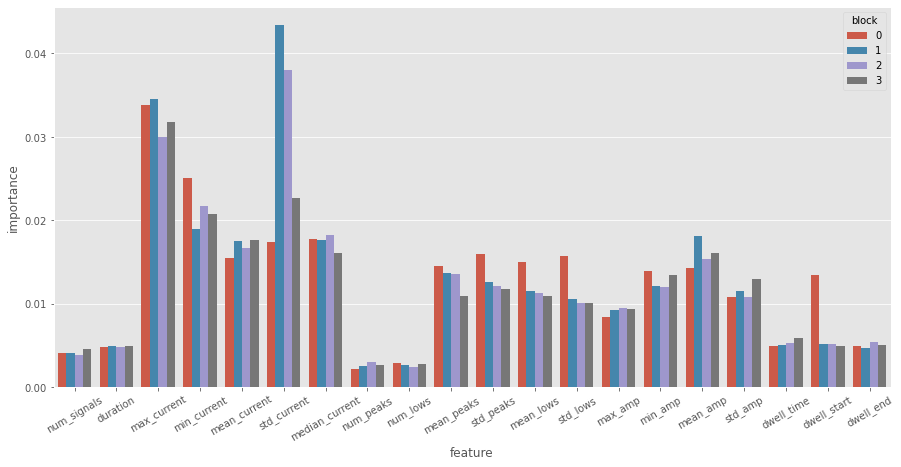

In [37]:
ax = sns.barplot(data=importance_df, x='feature', y='importance', hue='block')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)